# **Random Forest With Toy Data**
*   Random forest is an ensemble of decision tree algorithms.

*   It is an extension of bootstrap aggregation (bagging) of decision trees and can be used for classification and regression problems.
*   In bagging, a number of decision trees are created where each tree is created from a different bootstrap sample of the training dataset.
*   A bootstrap sample is a sample of the training dataset where a sample may appear more than once in the sample, referred to as sampling with replacement.
*   Predictions from the trees are averaged across all decision trees resulting in better performance than any single tree in the model.

**Reference** : https://machinelearningmastery.com/random-forest-ensemble-in-python/

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## Random Forest with classification
*   First, we will use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features.
* make_classification() : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)
type(X)

(1000, 20) (1000,)


numpy.ndarray

In [5]:
print(X)
#As we can see there are 1000 samples(Rows) and 20 features(columns) are there in data 

[[ -8.52381793   5.24451077 -12.14967704 ...   1.05057966   0.6975331
    0.26076035]
 [ -0.05916285  -3.54893654   0.28450157 ...   2.25695685   1.22878976
   -2.35705572]
 [  1.43722964  -2.7930806    3.06777424 ...   7.17348666   2.7348798
   -5.86519533]
 ...
 [  3.16342902  -9.33711497   9.98425127 ...  -2.10531942  -0.81155073
   -1.87188942]
 [ -9.02657972   2.59981304  -4.6665526  ...  -1.4839017   -1.30836833
    0.22976655]
 [ -2.91686079   2.27957528  -1.00615184 ...  -0.67922735  -2.84990903
   -2.06836683]]


In [8]:
print(y) 
#As we can see there are 2 classes in target feature.
#we can make more then 2 class classification problem by giving setting value of n_classes in make_classification

[0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1
 0 0 0 0 1 1 0 0 0 1 1 0 

*  **We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.**

**Please Refer following links for more understanding**
* cross_val_score : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* RepeatedStratifiedKFold: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
* RandomForestClassifier()  : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [12]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=25, n_informative=20, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
#every time when run algorithm result may vary because of stochastic nature of learning algorithm

Accuracy: 0.907 (0.034)


**To make prediction for classification First, the random forest ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.**

In [14]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
#here we are prediction on single sample same way we can predict when we have test data in real world
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])


Predicted Class: 0


# Random Forest for regression
*  First, we can use the make_regression() function to create a synthetic regression problem with 1,000 examples and 20 input features.
* **make_regression()** : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [15]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=30, n_informative=25, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 30) (1000,)


In [16]:
print(X)  #data with 1000 samples(rows) and 30 features(columns)

[[-2.26701202e+00  1.32441809e+00  4.42677115e-01 ... -2.84081199e-01
  -5.78804087e-01 -2.46932549e-01]
 [-7.05819970e-01 -1.70012060e-01  6.04344101e-01 ... -4.67016251e-02
  -4.62142098e-01  2.70344069e-01]
 [ 8.65072824e-01 -1.09401380e-01 -1.38215062e+00 ... -1.84724568e+00
   2.42625947e-01  1.49484284e+00]
 ...
 [-1.91247129e+00 -2.37674786e+00 -5.61144223e-01 ...  7.78416508e-01
  -3.38627529e-01 -9.43300023e-01]
 [-9.57559083e-01 -4.37132565e-01 -3.51826978e-01 ...  8.58199428e-01
  -7.26032272e-01 -1.14894528e-01]
 [-4.96432932e-02  1.14081588e-01 -2.68005109e-01 ...  6.04599295e-04
   6.39248784e-01  8.85120896e-01]]


* **we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. We will report the mean absolute error (MAE) of the model across all repeats and folds.**

* **The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.**

In [19]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.660 (8.141)


* In this case, we can see the random forest ensemble with default hyperparameters achieves a MAE of about 90.
* We can also use the random forest model as a final model and make predictions for regression.

* First, the random forest ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

* The example below demonstrates this on our regression dataset.



In [22]:
# random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])


Prediction: -147


*  specific results may vary given the stochastic nature of the learning algorithm

# Random Forest HyperParameters
* ## Explore Number of samples
  *  Each decision tree in the ensemble is fit on a bootstrap sample drawn from the training dataset.

  *  This can be turned off by setting the “bootstrap” argument to False, if you desire. In that case, the whole training dataset will be used to train each decision tree. This is not recommended.
  * The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.
  * For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.
  * A smaller sample size will make trees more different, and a larger sample size will make the trees more similar. Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.
  * The example below demonstrates the effect of different bootstrap sample sizes from 10 percent to 100 percent on the random forest algorithm.
  

>10 0.855 (0.035)
>20 0.876 (0.024)
>30 0.879 (0.025)
>40 0.891 (0.027)
>50 0.897 (0.026)
>60 0.894 (0.025)
>70 0.899 (0.028)
>80 0.900 (0.023)
>90 0.902 (0.024)
>100 0.901 (0.027)


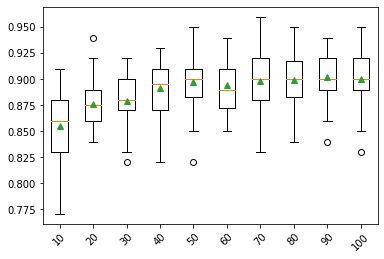

In [23]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = RandomForestClassifier(max_samples=0.1)
	models['20'] = RandomForestClassifier(max_samples=0.2)
	models['30'] = RandomForestClassifier(max_samples=0.3)
	models['40'] = RandomForestClassifier(max_samples=0.4)
	models['50'] = RandomForestClassifier(max_samples=0.5)
	models['60'] = RandomForestClassifier(max_samples=0.6)
	models['70'] = RandomForestClassifier(max_samples=0.7)
	models['80'] = RandomForestClassifier(max_samples=0.8)
	models['90'] = RandomForestClassifier(max_samples=0.9)
	models['100'] = RandomForestClassifier(max_samples=None)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

* **In this case, the results suggest that using a bootstrap sample size that is equal to the size of the training dataset achieves the best results on this dataset.**

* **A box and whisker plot is created for the distribution of accuracy scores for each bootstrap sample size.**

* **In this case, we can see a general trend that the larger the sample, the better the performance of the model.**

##  **Explore Number of features**

* The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

* It is set via the max_features argument and defaults to the square root of the number of input features. In this case, for our test dataset, this would be sqrt(20) or about four features.

* The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 1 to 7 and would expect a small value, around four, to perform well based on the heuristic.

>1 0.890 (0.028)
>2 0.903 (0.027)
>3 0.903 (0.032)
>4 0.900 (0.025)
>5 0.904 (0.025)
>6 0.897 (0.023)
>7 0.902 (0.022)


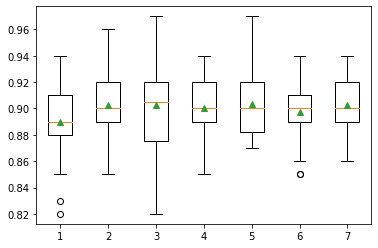

In [24]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['1'] = RandomForestClassifier(max_features=1)
	models['2'] = RandomForestClassifier(max_features=2)
	models['3'] = RandomForestClassifier(max_features=3)
	models['4'] = RandomForestClassifier(max_features=4)
	models['5'] = RandomForestClassifier(max_features=5)
	models['6'] = RandomForestClassifier(max_features=6)
	models['7'] = RandomForestClassifier(max_features=7)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

* In this case, the results suggest that a value between three and five would be appropriate, confirming the sensible default of four on this dataset.
* A value of five might even be better given the smaller standard deviation in classification accuracy as compared to a value of three or four.
* A box and whisker plot is created for the distribution of accuracy scores for each feature set size.
* We can see a trend in performance rising and peaking with values between three and five and falling again as larger feature set sizes are considered

## **Explore Number Of Trees**
* The number of trees is another key hyperparameter to configure for the random forest.

* Typically, the number of trees is increased until the model performance stabilizes. 
* Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

* The number of trees can be set via the “n_estimators” argument and defaults to 100.

* The example below explores the effect of the number of trees with values between 10 to 1,000.

>10 0.870 (0.032)
>50 0.898 (0.031)
>100 0.901 (0.027)
>500 0.904 (0.023)
>1000 0.904 (0.023)


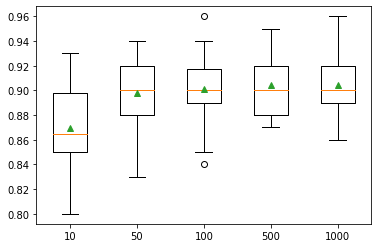

In [25]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = RandomForestClassifier(n_estimators=10)
	models['50'] = RandomForestClassifier(n_estimators=50)
	models['100'] = RandomForestClassifier(n_estimators=100)
	models['500'] = RandomForestClassifier(n_estimators=500)
	models['1000'] = RandomForestClassifier(n_estimators=1000)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

* **In this case, we can see that performance rises and stays flat after about 100 trees. Mean accuracy scores fluctuate across 100, 500, and 1,000 trees and this may be statistical noise.** 
* **Default value of n_estimator in RandomForestClassifier is 100**

## **Explore Tree Depth**
* A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

* By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.

* The maximum tree depth can be specified via the max_depth argument and is set to None (no maximum depth) by default.

* The example below explores the effect of random forest maximum tree depth on model performance.

>1 0.772 (0.033)
>2 0.810 (0.035)
>3 0.835 (0.025)
>4 0.851 (0.029)
>5 0.872 (0.025)
>6 0.882 (0.024)
>7 0.892 (0.021)
>None 0.904 (0.023)


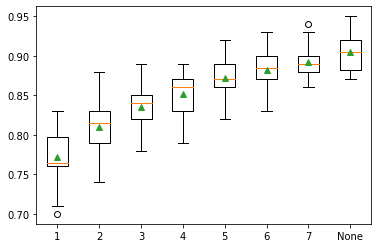

In [26]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['1'] = RandomForestClassifier(max_depth=1)
	models['2'] = RandomForestClassifier(max_depth=2)
	models['3'] = RandomForestClassifier(max_depth=3)
	models['4'] = RandomForestClassifier(max_depth=4)
	models['5'] = RandomForestClassifier(max_depth=5)
	models['6'] = RandomForestClassifier(max_depth=6)
	models['7'] = RandomForestClassifier(max_depth=7)
	models['None'] = RandomForestClassifier(max_depth=None)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

* In this case, we can see that larger depth results in better model performance, with the default of no maximum depth achieving the best performance on this dataset.
* A box and whisker plot is created for the distribution of accuracy scores for each configured maximum tree depth.

* In this case, we can see a trend of improved performance with increase in tree depth, supporting the default of no maximum depth.